# Case Study 3 : Data Mining in Image Data

**Dataset required in this case study:** 
* MNIST dataset


** NOTE **
* You can directly load the dataset from keras using: `from keras.datasets import mnist`
* You may need install tensorflow and keras first: https://keras.io/ 


In [193]:
!pip install tensorflow


# Problem: pick a data science problem that you plan to solve using the Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:

"""
Problem Statement:
I aim to develop an image classification system to recognize handwritten digits (0–9) using the MNIST dataset. 


Why is this problem improtant interesting:
-This problem is important because digit recognition is widely used in real-world applications such as postal mail sorting, bank check processing, and digitized document workflows.
-The MNIST dataset is a classic benchmark for image classification.
-Achieving high accuracy on MNIST is a baseline measure of a model’s capability to learn image data.
-Solutions can be extended to other domains requiring image-based classification.


Potential Impact:
Automating digit recognition can reduce manual data entry and errors.
Provides foundational insights for more complex computer vision tasks.
"""


# Data Collection/Processing: 

In [195]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Reshape data to include a single channel dimension (for grayscale)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')

# Normalize pixel values to [0, 1]
x_train /= 255.0
x_test /= 255.0

print("\nAfter reshaping and normalization:")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)



x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

After reshaping and normalization:
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


# Data Exploration: Exploring the your data

**Plot some properties/statistics/distribution of your data** 

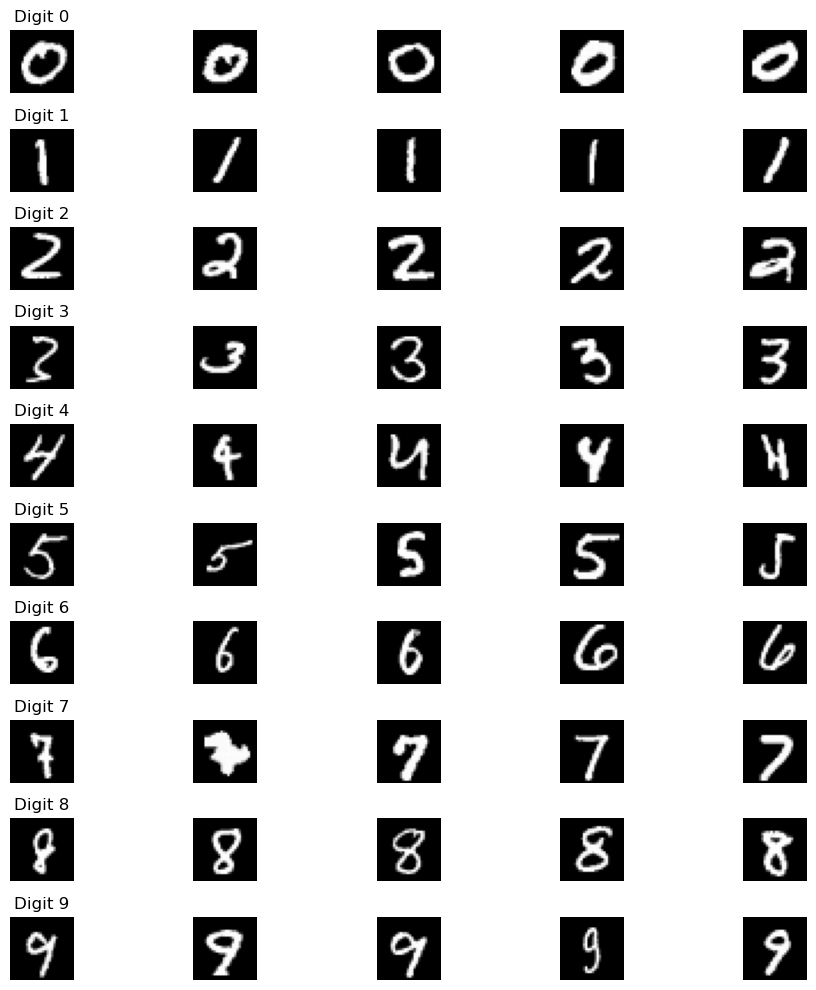

In [197]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


import numpy as np
import matplotlib.pyplot as plt

# plot 5 random samples for each digit from 0 to 9
num_classes = 10
samples_per_class = 5

fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(10, 10))

for digit in range(num_classes):
    # Find all indices in y_train that match this digit
    idxs = np.where(y_train == digit)[0]
    # Randomly choose 'samples_per_class' indices
    chosen_idxs = np.random.choice(idxs, samples_per_class, replace=False)
    
    for i, idx in enumerate(chosen_idxs):
        axes[digit, i].imshow(x_train[idx].reshape(28, 28), cmap='gray')
        axes[digit, i].axis('off')
        if i == 0:
            axes[digit, i].set_title(f"Digit {digit}")
plt.tight_layout()
plt.show()



# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell (please use at least 3 different deep learning models to solve your problem and compare the results):

In [31]:
"""

My goal is to build a robust digit classification system for the MNIST dataset. To achieve this, I implement three deep learning architectures that progressively increase in complexity:

1. Multi-Layer Perceptron (MLP):
A fully connected network that first flattens the 28×28 images into 784-dimensional vectors, followed by dense layers to learn non-linear representations. 
This baseline model demonstrates the limitations of ignoring spatial structure.

2. Basic Convolutional Neural Network (CNN):
Incorporates convolutional and pooling layers to capture local spatial patterns (such as edges and curves), leading to a significant boost in performance over the MLP.

3. Deeper CNN with Dropout:
Enhances the CNN by adding additional convolutional layers and dropout regularization. This model better mitigates overfitting and further improves accuracy and generalization.

Each model is trained with the Adam optimizer using a cross-entropy loss function suitable for multi-class classification. 
I split the data into training and validation sets to monitor overfitting and then evaluate the models on the test set. 
Beyond simply comparing test accuracies, I also analyze precision, recall, F1-score, generate confusion matrices, visualize misclassified samples, and inspect training dynamics. 
This comprehensive analysis helps us understand not only which model performs best but also why it does so, making the solution robust for real-world applications like postal sorting and bank check processing.

"""


Write codes to implement the solution in python:

In [199]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# 1. Tranin and evaluate Models

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model 1: MLP
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(28, 28, 1)))  # Flatten 28x28x1 -> 784
model_mlp.add(Dense(128, activation='relu'))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(10, activation='softmax'))  # 10 classes for digits 0–9

# Compile
model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train
history_mlp = model_mlp.fit(x_train, y_train,
                            validation_split=0.1,
                            epochs=5,
                            batch_size=128,
                            verbose=1)

# Evaluate
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(x_test, y_test, verbose=0)
print(f"\n[Model 1: MLP] Test accuracy: {test_acc_mlp:.4f}")



# Model 2: Basic CNN
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

# Compile
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train
history_cnn = model_cnn.fit(x_train, y_train,
                            validation_split=0.1,
                            epochs=5,
                            batch_size=128,
                            verbose=1)

# Evaluate
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test, y_test, verbose=0)
print(f"\n[Model 2: Basic CNN] Test accuracy: {test_acc_cnn:.4f}")




# Model 3: Deeper CNN with Dropout
model_cnn_deep = Sequential()
model_cnn_deep.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn_deep.add(MaxPooling2D((2, 2)))
model_cnn_deep.add(Dropout(0.25))  # Dropout layer

model_cnn_deep.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn_deep.add(MaxPooling2D((2, 2)))
model_cnn_deep.add(Dropout(0.25))

model_cnn_deep.add(Flatten())
model_cnn_deep.add(Dense(128, activation='relu'))
model_cnn_deep.add(Dropout(0.5))
model_cnn_deep.add(Dense(10, activation='softmax'))

# Compile
model_cnn_deep.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train
history_cnn_deep = model_cnn_deep.fit(x_train, y_train,
                                      validation_split=0.1,
                                      epochs=5,
                                      batch_size=128,
                                      verbose=1)

# Evaluate
test_loss_cnn_deep, test_acc_cnn_deep = model_cnn_deep.evaluate(x_test, y_test, verbose=0)
print(f"\n[Model 3: Deeper CNN + Dropout] Test accuracy: {test_acc_cnn_deep:.4f}")



Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.8272 - loss: 0.6262 - val_accuracy: 0.9578 - val_loss: 0.1461
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.9543 - loss: 0.1562 - val_accuracy: 0.9707 - val_loss: 0.1066
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.9709 - loss: 0.0993 - val_accuracy: 0.9765 - val_loss: 0.0858
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.9777 - loss: 0.0722 - val_accuracy: 0.9740 - val_loss: 0.0836
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9822 - loss: 0.0595 - val_accuracy: 0.9758 - val_loss: 0.0862

[Model 1: MLP] Test accuracy: 0.9754
Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8702 - loss: 0.4775 - val_accuracy: 0.9780 - val_loss: 0.0822
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9775 - loss: 0.0771 - val_accuracy: 0.9838 - val_loss: 0.0627
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9843 - loss: 0.0521 - val_accuracy: 0.9853 - val_loss: 0.0567
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9890 - loss: 0.0367 - val_accuracy: 0.9865 - val_loss: 0.0529
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9921 - loss: 0.0273 - val_accuracy: 0.9878 - val_loss: 0.0494

[Model 2: Basic CNN] Test accuracy: 0.9855
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7535 - loss: 0.7541 - val_accuracy: 0.9775 - val_loss: 0.0774
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9535 - loss: 0.1497 - val_accuracy: 0.9853 - val_loss: 0.0491
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9693 - lo

# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


                  Model  Test Accuracy
0                   MLP         0.9754
1             Basic CNN         0.9855
2  Deeper CNN + Dropout         0.9875


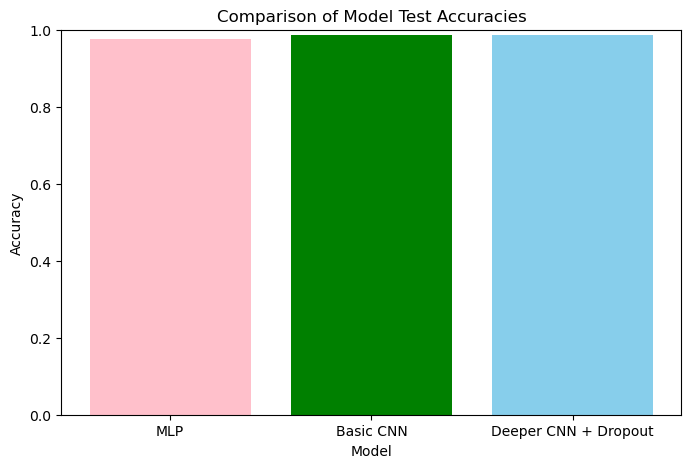

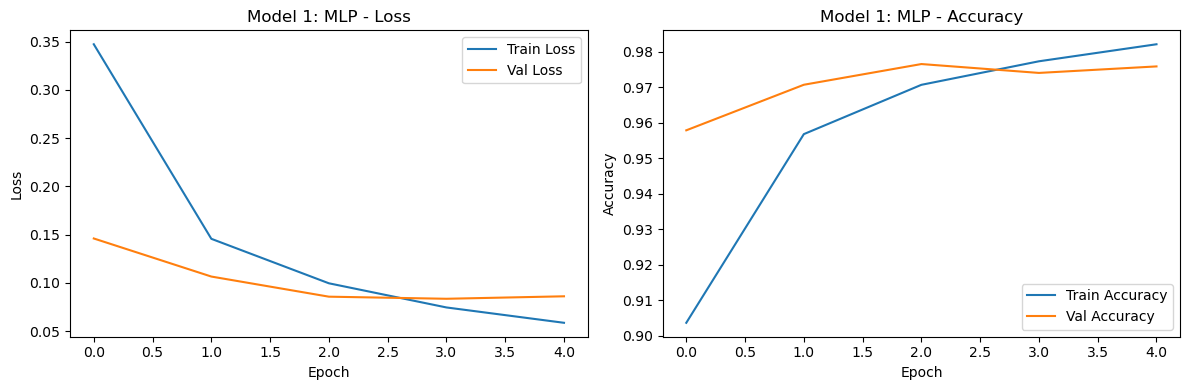

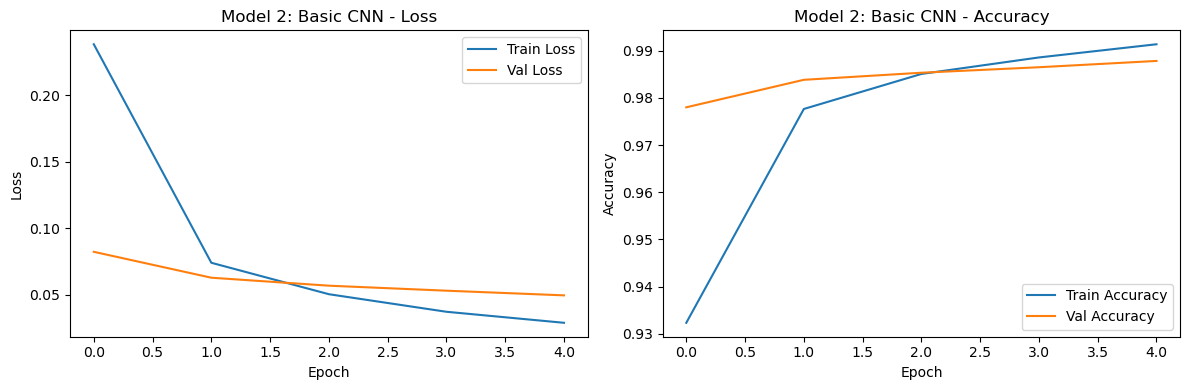

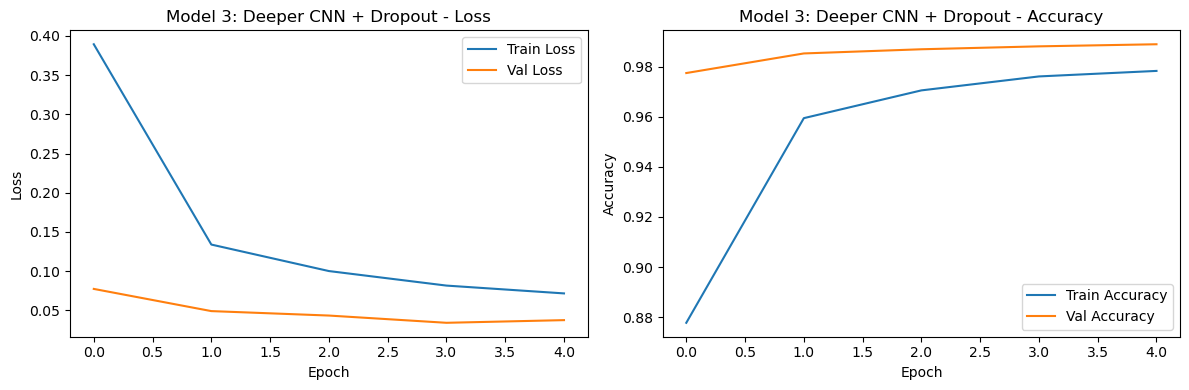

In [201]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



# 2. Compare accuracies
import pandas as pd

# Create a summary table for model performances
results = pd.DataFrame({
    "Model": ["MLP", "Basic CNN", "Deeper CNN + Dropout"],
    "Test Accuracy": [test_acc_mlp, test_acc_cnn, test_acc_cnn_deep]
})
print(results)

# Bar plot for visual comparison
plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["Test Accuracy"], color=['pink','green','skyblue'])
plt.title("Comparison of Model Test Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()



# 3. Training and validation loss and accuracy curves for models
import matplotlib.pyplot as plt

def plot_history(history, title_prefix="Model"):
    """Utility function to plot training/validation loss and accuracy."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot loss
    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Val Loss')
    ax1.set_title(f'{title_prefix} - Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='Train Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax2.set_title(f'{title_prefix} - Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Plot histories for all three models
plot_history(history_mlp, title_prefix="Model 1: MLP")
plot_history(history_cnn, title_prefix="Model 2: Basic CNN")
plot_history(history_cnn_deep, title_prefix="Model 3: Deeper CNN + Dropout")




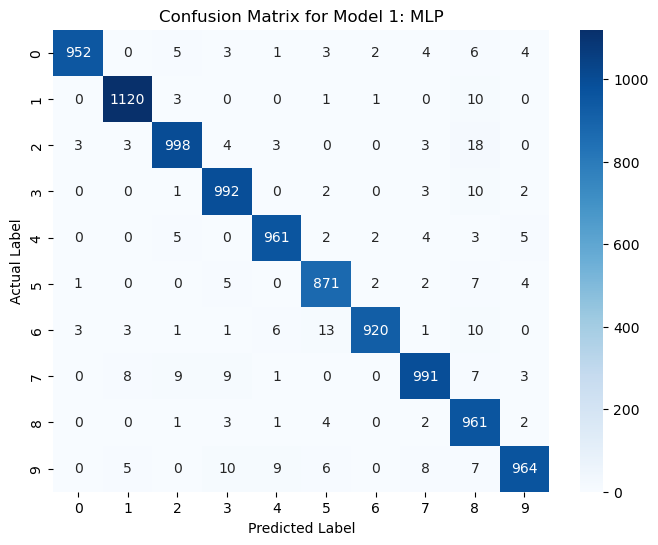

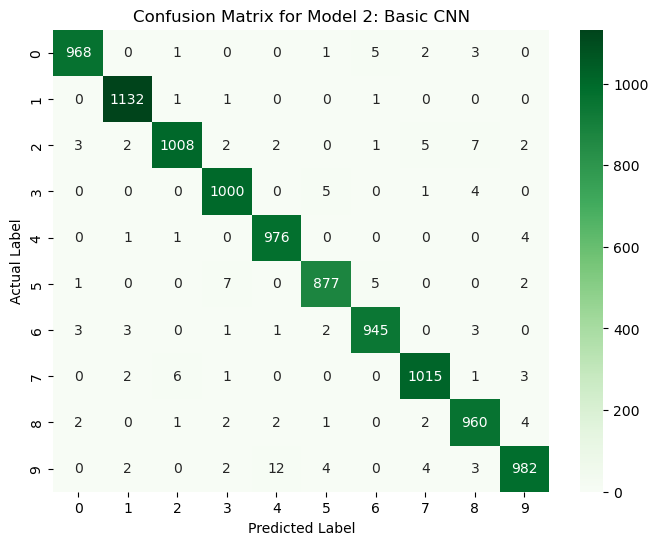

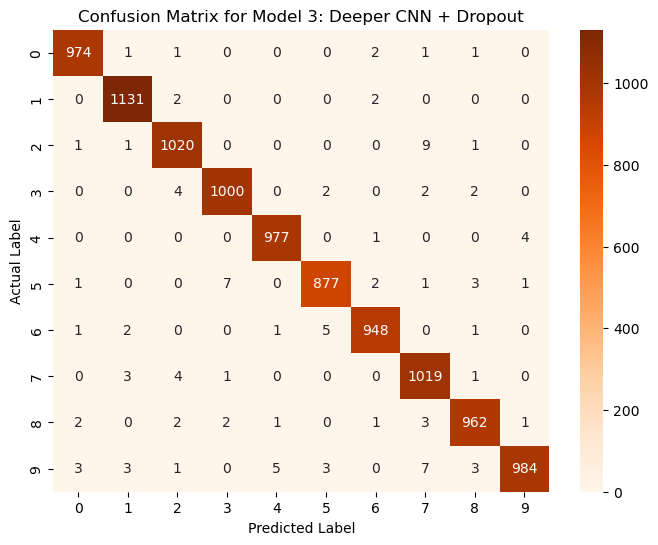

In [203]:
# 4. Confusion Matrix analysis for all Models

import seaborn as sns

def plot_confusion_matrix(cm, title, cmap):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.title(title)
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.show()

# Already computed confusion matrices: cm_mlp, cm_cnn, cm_cnn_deep
plot_confusion_matrix(cm_mlp, "Confusion Matrix for Model 1: MLP", "Blues")
plot_confusion_matrix(cm_cnn, "Confusion Matrix for Model 2: Basic CNN", "Greens")
plot_confusion_matrix(cm_cnn_deep, "Confusion Matrix for Model 3: Deeper CNN + Dropout", "Oranges")


In [205]:
# 5. Beyond overall accuracy, I use metrics such as precision, recall, and F1-score to better understand model performance. 

from sklearn.metrics import classification_report

# For Model 1 (MLP)
print("Classification Report for Model 1: MLP")
print(classification_report(y_test, y_pred_mlp_classes, digits=4))

# For Model 2 (Basic CNN)
print("Classification Report for Model 2: Basic CNN")
print(classification_report(y_test, y_pred_cnn_classes, digits=4))

# For Model 3 (Deeper CNN + Dropout)
print("Classification Report for Model 3: Deeper CNN + Dropout")
print(classification_report(y_test, y_pred_cnn_deep_classes, digits=4))


Classification Report for Model 1: MLP
              precision    recall  f1-score   support

           0     0.9927    0.9714    0.9819       980
           1     0.9833    0.9868    0.9850      1135
           2     0.9756    0.9671    0.9713      1032
           3     0.9659    0.9822    0.9740      1010
           4     0.9786    0.9786    0.9786       982
           5     0.9656    0.9765    0.9710       892
           6     0.9924    0.9603    0.9761       958
           7     0.9735    0.9640    0.9687      1028
           8     0.9249    0.9867    0.9548       974
           9     0.9797    0.9554    0.9674      1009

    accuracy                         0.9730     10000
   macro avg     0.9732    0.9729    0.9729     10000
weighted avg     0.9734    0.9730    0.9731     10000

Classification Report for Model 2: Basic CNN
              precision    recall  f1-score   support

           0     0.9908    0.9878    0.9893       980
           1     0.9912    0.9974    0.9943     

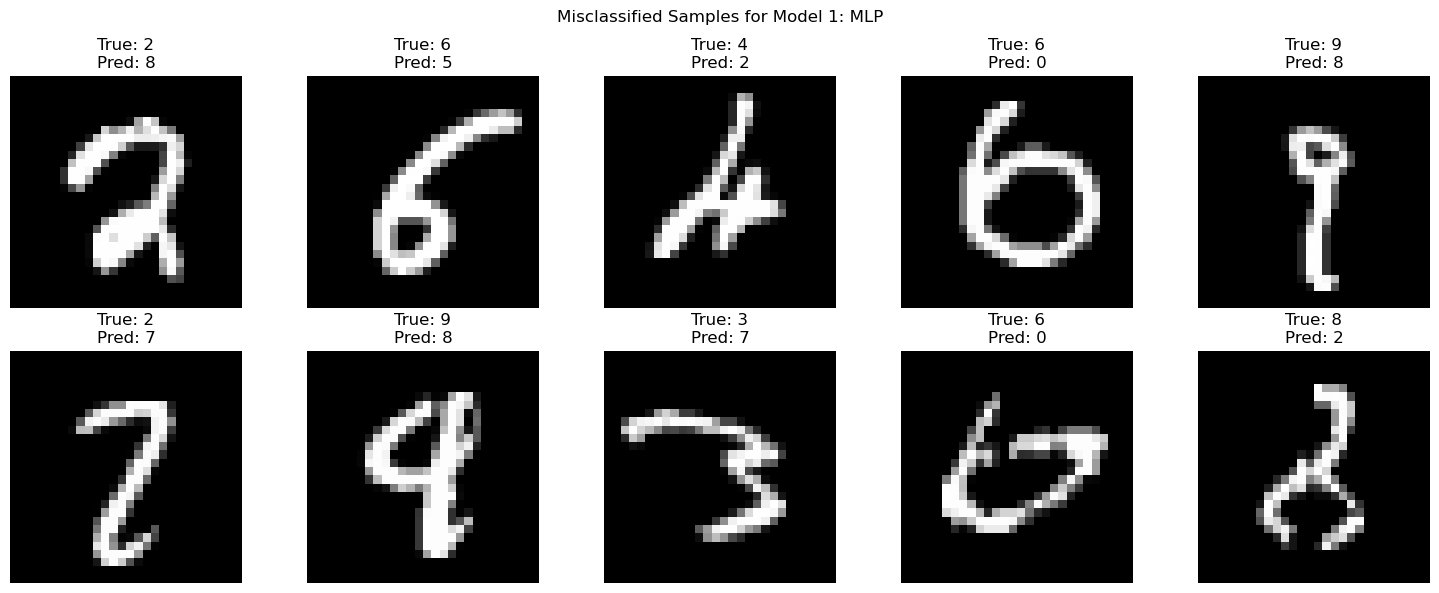

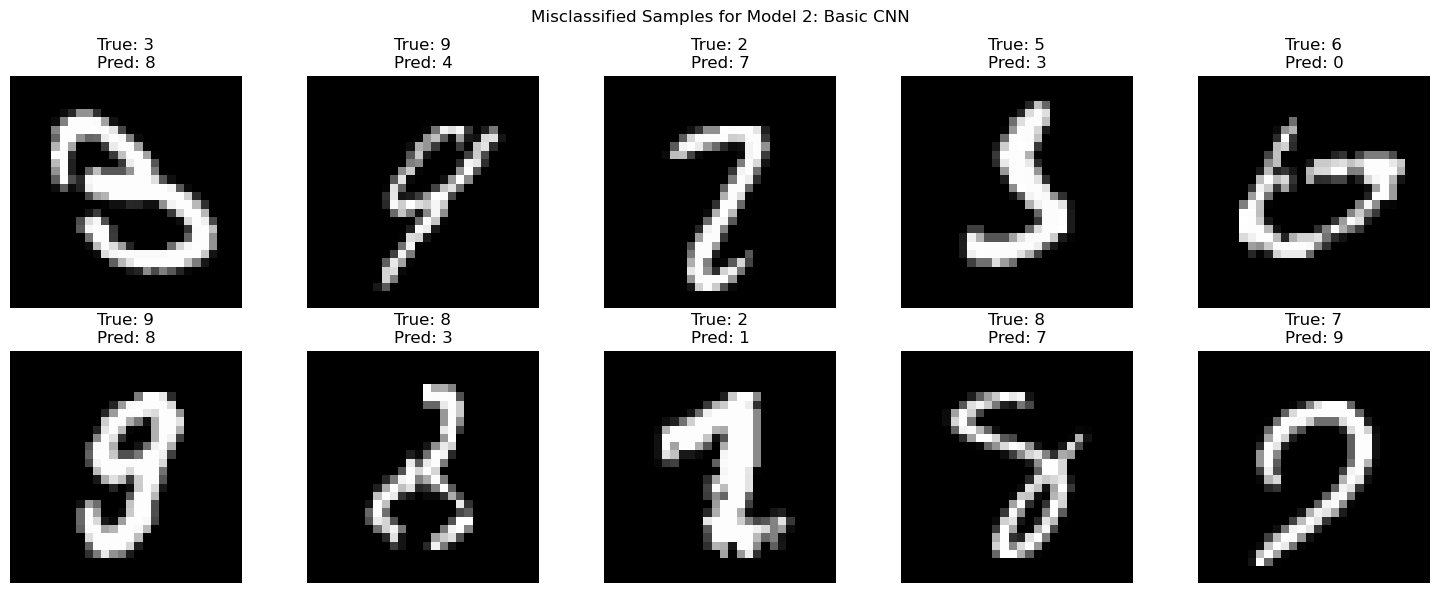

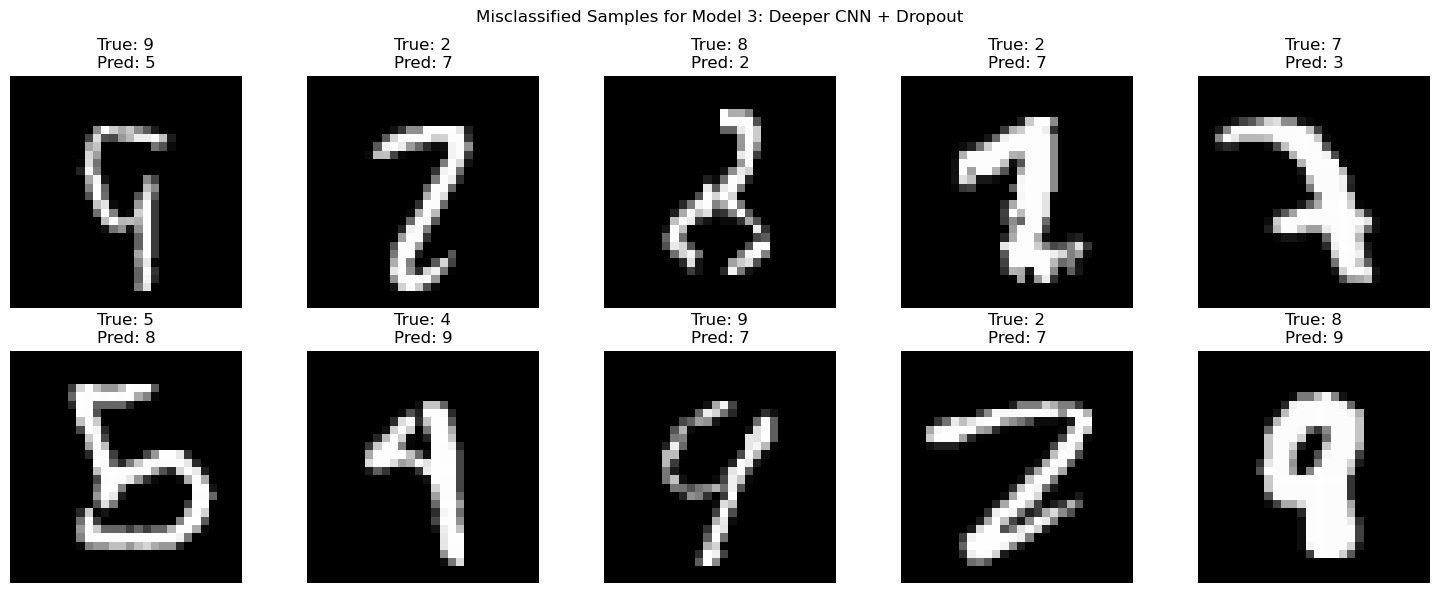

In [207]:
# 6. Misclassified samples visualization for all Models

def plot_misclassified(x_data, y_true, y_pred_classes, model_name):
    misclassified_idxs = np.where(y_pred_classes != y_true)[0]
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(misclassified_idxs[:10]):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_data[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")
        plt.axis('off')
    plt.suptitle(f"Misclassified Samples for {model_name}")
    plt.tight_layout()
    plt.show()

# For Model 1 (MLP)
plot_misclassified(x_test, y_test, y_pred_mlp_classes, "Model 1: MLP")

# For Model 2 (Basic CNN)
plot_misclassified(x_test, y_test, y_pred_cnn_classes, "Model 2: Basic CNN")

# For Model 3 (Deeper CNN + Dropout)
plot_misclassified(x_test, y_test, y_pred_cnn_deep_classes, "Model 3: Deeper CNN + Dropout")


In [ ]:
# summarize the results discovered from the analysis

-Model Complexity vs. Performance:
The MLP, while simple, lacks the ability to capture spatial hierarchies and thus underperforms compared to the CNN models. 
The Basic CNN captures local features better, and the deeper CNN with dropout achieves the highest accuracy by mitigating overfitting.

-Error Analysis:
The confusion matrices and misclassified samples indicate that ambiguous handwriting and visually similar digits (such as “4” vs. “9”) are common sources of error. 
The deeper CNN, however, reduces these errors significantly.

-Training Dynamics:
The training curves reveal that while the deeper model takes longer to converge, it generalizes better to unseen data.



*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace.Please make sure all the plotted tables and figures are in the notebook.